In [237]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
train = pd.read_csv("Train (3).csv")
test = pd.read_csv("Test (3).csv")
sample_sub = pd.read_csv("SampleSubmission (2).csv")

In [239]:
train_original = train.copy()
test_original = test.copy()

In [240]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [241]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [243]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [244]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   unique_id     33610 non-null  object
 1   bank_account  33610 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 525.3+ KB


In [245]:
train.shape

(23524, 13)

In [246]:
test.shape

(10086, 12)

In [247]:
train = train.drop('uniqueid', axis = 1)
test = test.drop('uniqueid', axis = 1)
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [248]:
categorical_columns = train.select_dtypes(include = 'object')
categorical_columns

,country,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [249]:
categorical_column = test.select_dtypes(include = 'object')
categorical_column

,country,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Urban,Yes,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,Urban,Yes,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,Rural,No,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,Rural,No,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,Urban,No,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...
10081,Uganda,Rural,No,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,Urban,Yes,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,Urban,Yes,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,Rural,Yes,Female,Spouse,Married/Living together,Primary education,Self employed


In [250]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [251]:
train['bank_account'].value_counts(normalize = True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

In [252]:
test.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [253]:
train.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

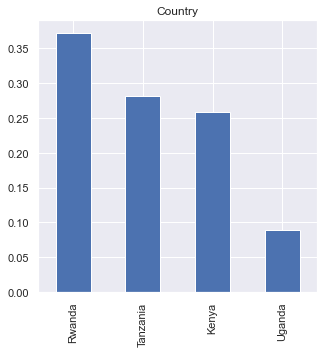

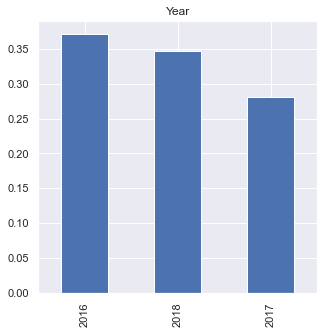

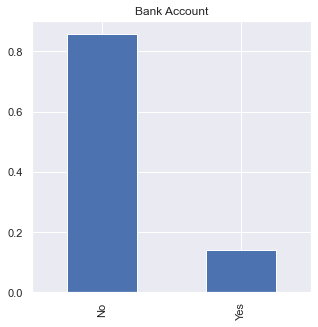

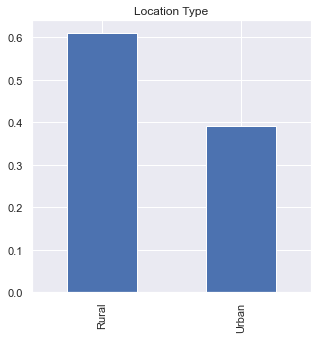

In [254]:
train['country'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Country')
plt.show()
train['year'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Year')
plt.show()
train['bank_account'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Bank Account')
plt.show()
train['location_type'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Location Type')
plt.show()

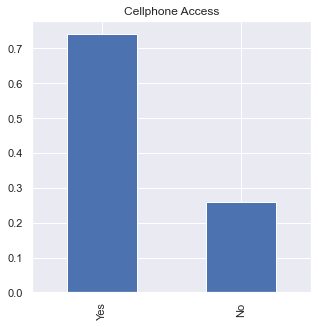

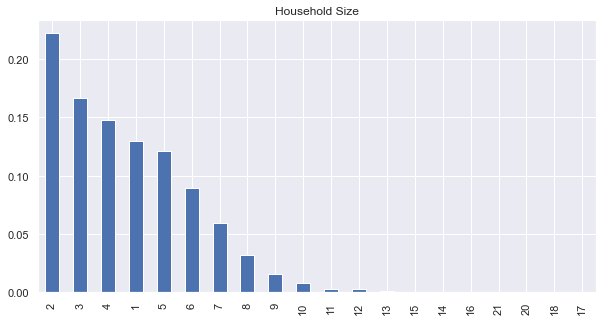

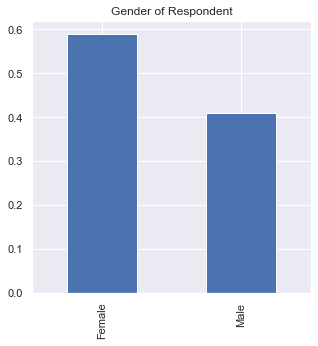

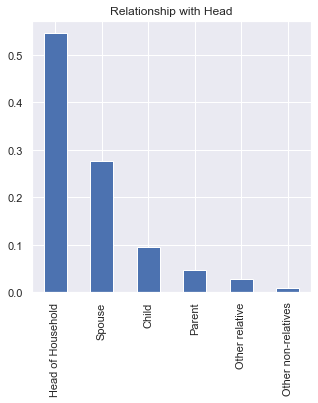

In [255]:
train['cellphone_access'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Cellphone Access')
plt.show()
train['household_size'].value_counts(normalize=True).plot.bar(figsize=(10,5), title='Household Size')
plt.show()
#train['age_of_respondent'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Age of Respondent')
#plt.show()
train['gender_of_respondent'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Gender of Respondent')
plt.show()
train['relationship_with_head'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Relationship with Head')
plt.show()

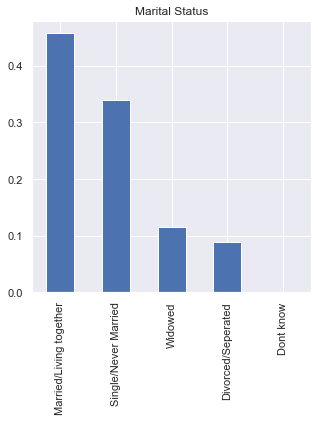

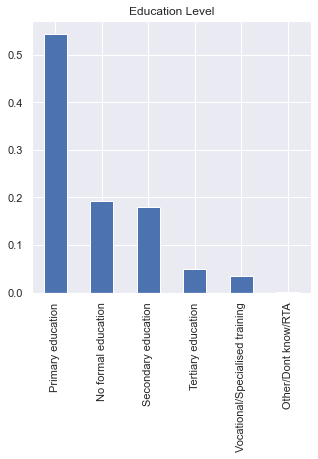

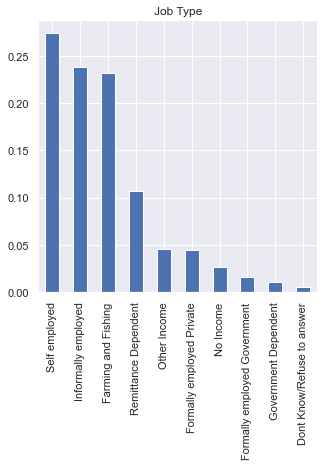

In [256]:
train['marital_status'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Marital Status')
plt.show()
train['education_level'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Education Level')
plt.show()
train['job_type'].value_counts(normalize=True).plot.bar(figsize=(5,5), title='Job Type')
plt.show()

<AxesSubplot:xlabel='bank_account', ylabel='count'>

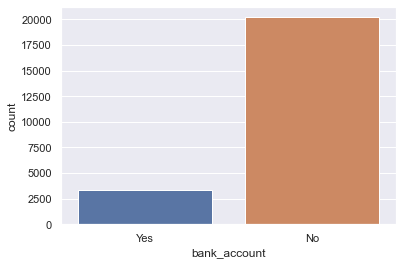

In [257]:
sns.countplot(data = train, x = train['bank_account'])

<AxesSubplot:ylabel='bank_account'>

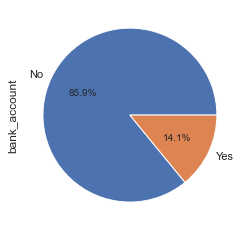

In [258]:
train['bank_account'].value_counts().plot.pie(autopct = '%1.1f%%')

### Data Column ```Country```

<AxesSubplot:xlabel='country', ylabel='Count'>

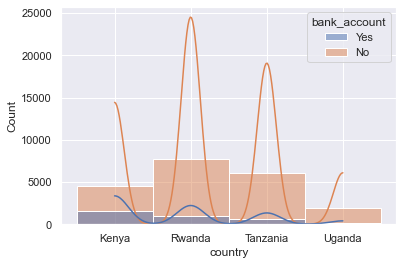

In [259]:
sns.histplot(data = train, x = train['country'], hue = train['bank_account'], kde = True)

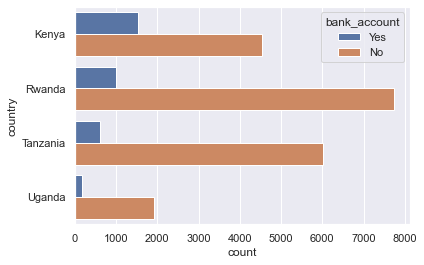

In [260]:
sns.set(style = 'darkgrid')
sns.countplot(y = train['country'], hue= train['bank_account'], data = train)
plt.show()

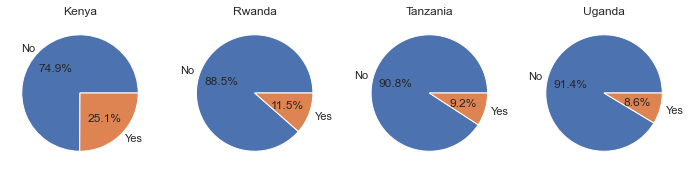

In [261]:
fig, axes = plt.subplots(1,4, figsize=(12,12))
cd= train.country.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['country']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```year```

<AxesSubplot:xlabel='year', ylabel='Count'>

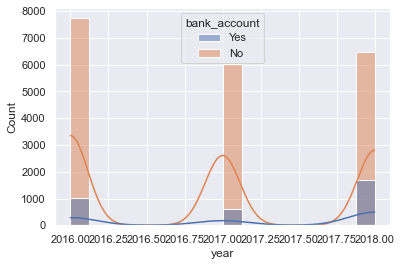

In [262]:
sns.histplot(data = train, x = train['year'], hue = train['bank_account'], kde = True)

<AxesSubplot:xlabel='Count', ylabel='year'>

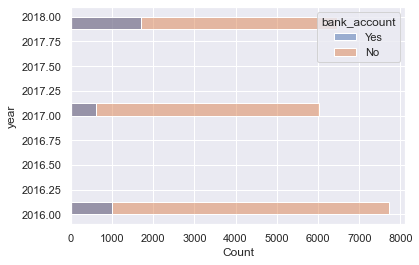

In [263]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, y = train['year'], hue = train['bank_account'])

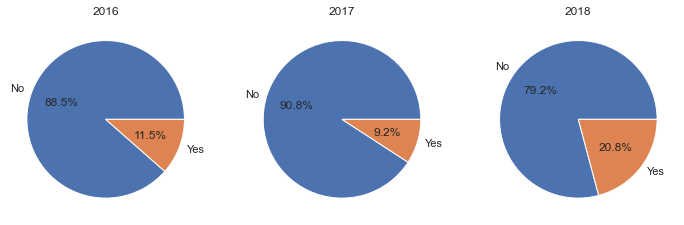

In [264]:
fig, axes = plt.subplots(1,3, figsize=(12,12))
cd= train.year#.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['year']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```location_type```

<AxesSubplot:xlabel='location_type', ylabel='Count'>

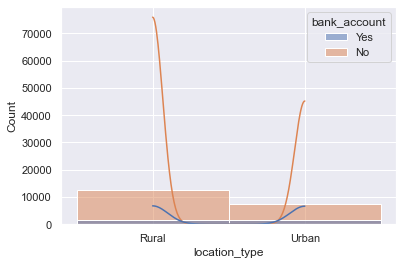

In [265]:
sns.histplot(data = train, x = train['location_type'], hue = train['bank_account'], kde = True)

<AxesSubplot:xlabel='location_type', ylabel='Count'>

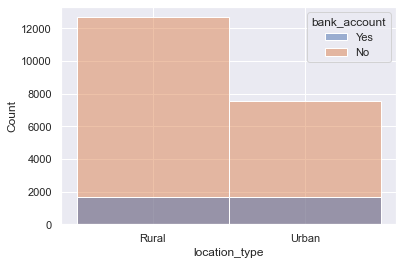

In [266]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['location_type'], hue = train['bank_account'])

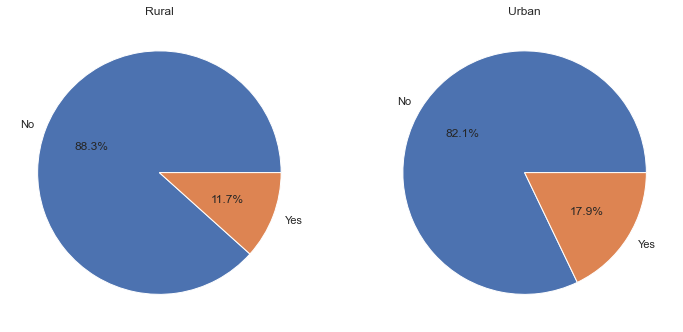

In [267]:
fig, axes = plt.subplots(1,2, figsize=(12,12))
cd= train.location_type.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['location_type']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```cellphone_access```

<AxesSubplot:xlabel='cellphone_access', ylabel='Count'>

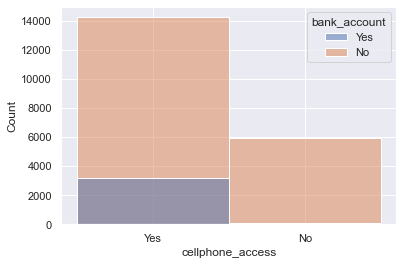

In [268]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['cellphone_access'], hue = train['bank_account'])

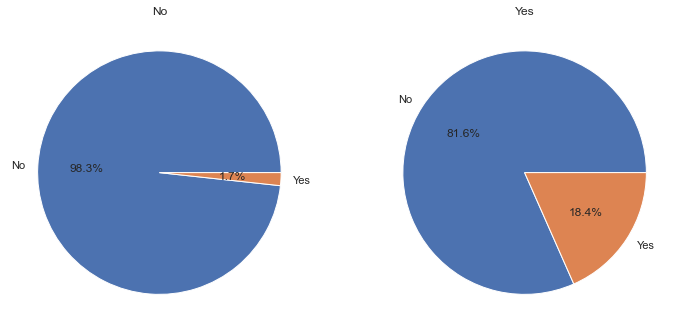

In [269]:
fig, axes = plt.subplots(1,2, figsize=(12,12))
cd= train.cellphone_access.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['cellphone_access']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```education_level```

<AxesSubplot:xlabel='education_level', ylabel='Count'>

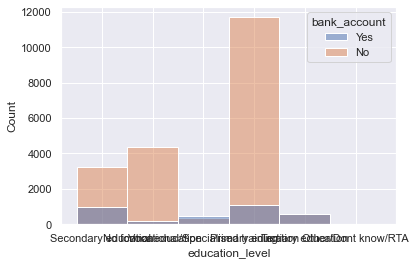

In [270]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['education_level'], hue = train['bank_account'])

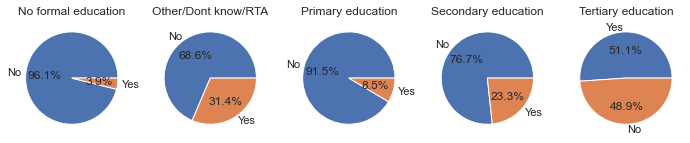

In [271]:
fig, axes = plt.subplots(1,5, figsize=(12,12))
cd= train.education_level.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['education_level']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```job_type```

<AxesSubplot:xlabel='job_type', ylabel='Count'>

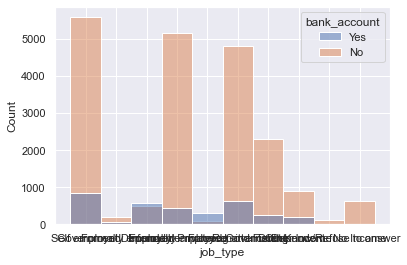

In [272]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['job_type'], hue = train['bank_account'])

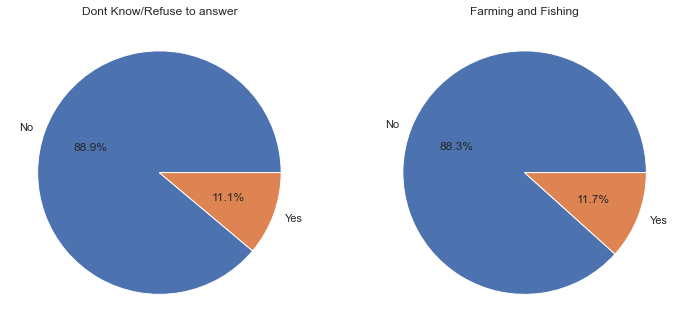

In [273]:
fig, axes = plt.subplots(1,2, figsize=(12,12))
cd= train.job_type.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['job_type']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```marital_status```

<AxesSubplot:xlabel='marital_status', ylabel='Count'>

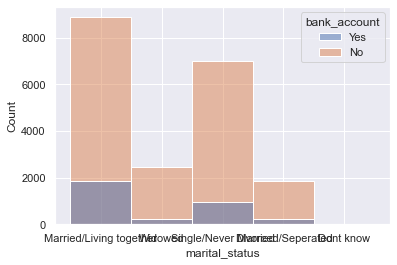

In [274]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['marital_status'], hue = train['bank_account'])

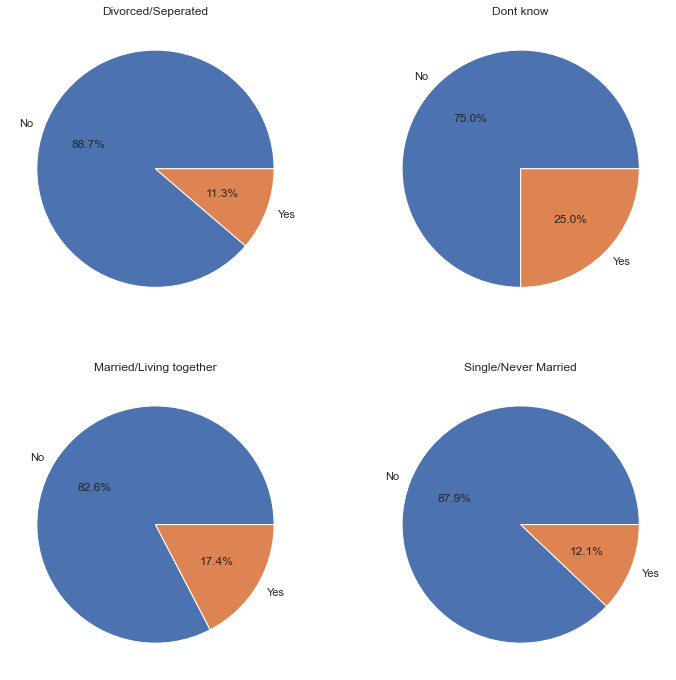

In [275]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
cd= train.marital_status.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['marital_status']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```relationship_with_head```

<AxesSubplot:xlabel='relationship_with_head', ylabel='Count'>

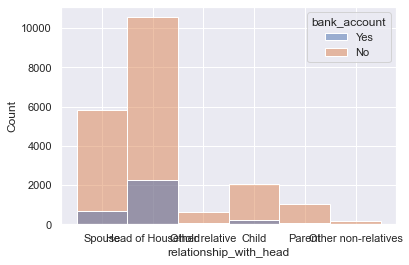

In [276]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['relationship_with_head'], hue = train['bank_account'])

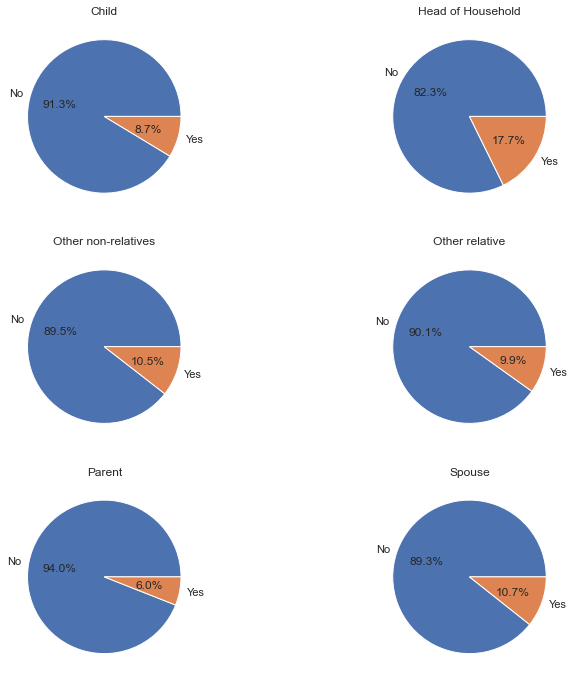

In [277]:
fig, axes = plt.subplots(3,2, figsize=(12,12))
cd= train.relationship_with_head.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['relationship_with_head']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```gender_of_respondent```

<AxesSubplot:xlabel='gender_of_respondent', ylabel='Count'>

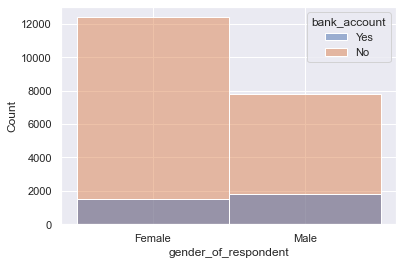

In [278]:
sns.set(style = 'darkgrid')
sns.histplot(data = train, x = train['gender_of_respondent'], hue = train['bank_account'])

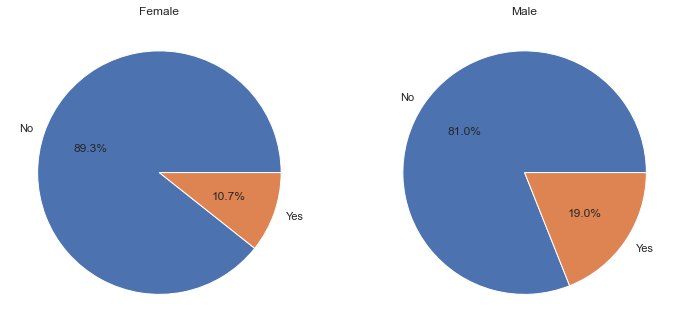

In [279]:
fig, axes = plt.subplots(1,2, figsize=(12,12))
cd= train.gender_of_respondent.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['gender_of_respondent']==unique[i]]['bank_account'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

In [280]:
train.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [281]:
train.nunique()

country                    4
year                       3
bank_account               2
location_type              2
cellphone_access           2
household_size            20
age_of_respondent         85
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


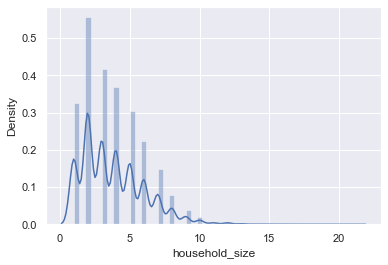

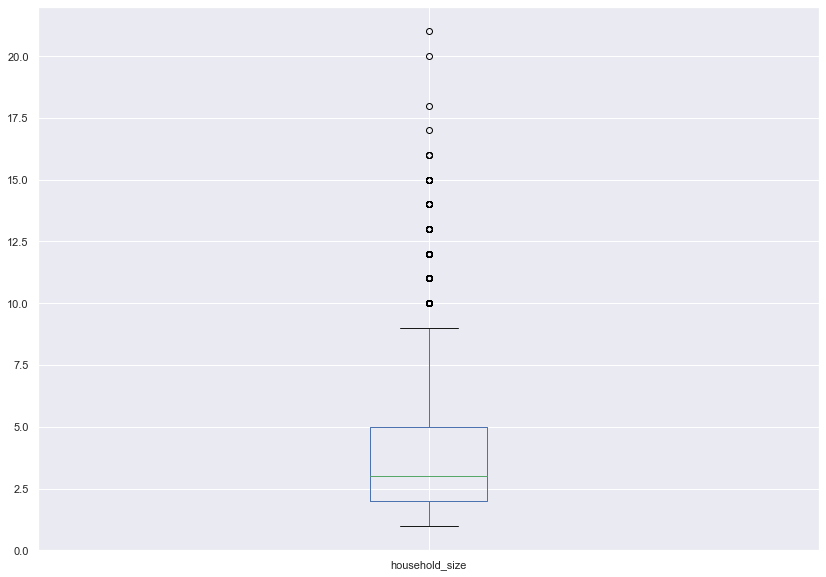

In [282]:
sns.distplot(train['household_size'])
plt.show()
train['household_size'].plot.box(figsize=(14,10))
plt.show()

In [283]:
df = pd.concat([train, test]).reset_index(drop=True)
df.head(5)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [284]:
for i in categorical_columns:
    enc = LabelEncoder()
    df[i] = enc.fit_transform(df[i])

In [285]:
len_train = len(train)
train = df[:len_train]
test = df[len_train:]

In [286]:
df = df.drop('bank_account', axis = 1)

df = pd.concat([train, test]).reset_index(drop=True)
df.head(5)

In [287]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


In [288]:
X = train.drop('bank_account', axis = 1)
y = train['bank_account']

In [289]:
X.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [290]:
model = RandomForestClassifier(n_estimators=100, random_state= 20, n_jobs = 2)

In [291]:
X_train,X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

model.score()

In [293]:
model.fit(X_train, y_train)
val_predictions = model.predict(X_valid)

In [294]:
print(mse(y_valid, val_predictions))

0.13417398696514593


In [295]:
df.columns

Index(['country', 'year', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [296]:
test_predictions = model.predict(df)
submission = sample_sub.copy()
submission['bank_account'] = test_predictions
submission.to_csv('FinancialInclusionSolution.csv', index= False)
submission.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,1
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
